# __Introduction__

>__Breast cancer (BC)__ is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

>The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

>____Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions____.

__Recommended Screening Guidelines__:
> ___Mammography. The most important screening test for breast cancer is the mammogram. A mammogram is an X-ray of the breast. It can detect breast cancer up to two years before the tumor can be felt by you or your doctor___.

> ___Women age 40–45 or older who are at average risk of breast cancer should have a mammogram once a year.
Women at high risk should have yearly mammograms along with an MRI starting at age 30___.

__Some Risk Factors for Breast Cancer__

> The following are some of the known risk factors for breast cancer. However, most cases of breast cancer cannot be linked to a specific cause. Talk to your doctor about your specific risk.

>__Age__. The chance of getting breast cancer increases as women age. Nearly 80 percent of breast cancers are found in women over the age of 50.

>__Personal history of breast cancer__. A woman who has had breast cancer in one breast is at an increased risk of developing cancer in her other breast.

>__Family history of breast cancer__. A woman has a higher risk of breast cancer if her mother, sister or daughter had breast cancer, especially at a young age (before 40). Having other relatives with breast cancer may also raise the risk.

>__Genetic factors__. Women with certain genetic mutations, including changes to the BRCA1 and BRCA2 genes, are at higher risk of developing breast cancer during their lifetime. Other gene changes may raise breast cancer risk as well.
__Childbearing and menstrual history__. The older a woman is when she has her first child, the greater her risk of breast cancer. 

____Also at higher risk are__

> __Women who menstruate for the first time at an early age (before 12)__.

> __Women who go through menopause late (after age 55).__

> __Women who’ve never had children.___



# __Objectives__

__This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant. To achieve this i have used machine learning classification methods to fit a function that can predict the discrete class of new input__.


__We Can download the Dataset from given Link__

dataset link-https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset

# Phase 1 — Data Preparation

> The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector


__Attribute Information__:

> ID number 2) Diagnosis (M = malignant, B = benign) 3–32)

# Ten real-valued features are computed for each cell nucleus:
1) radius (mean of distances from center to points on the perimeter)

2) texture (standard deviation of gray-scale values)

3) perimeter

4) area

5) smoothness (local variation in radius lengths)

6) compactness (perimeter² / area — 1.0)

7) concavity (severity of concave portions of the contour)

8) concave points (number of concave portions of the contour)

9) symmetry

10) fractal dimension (“coastline approximation” — 1)

__The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius__.

# Phase 2 — Data Exploration

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [5]:
df.shape

(569, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


__Cheking Null Values in Datasets__

In [8]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

# Phase 3 — Data Visualization

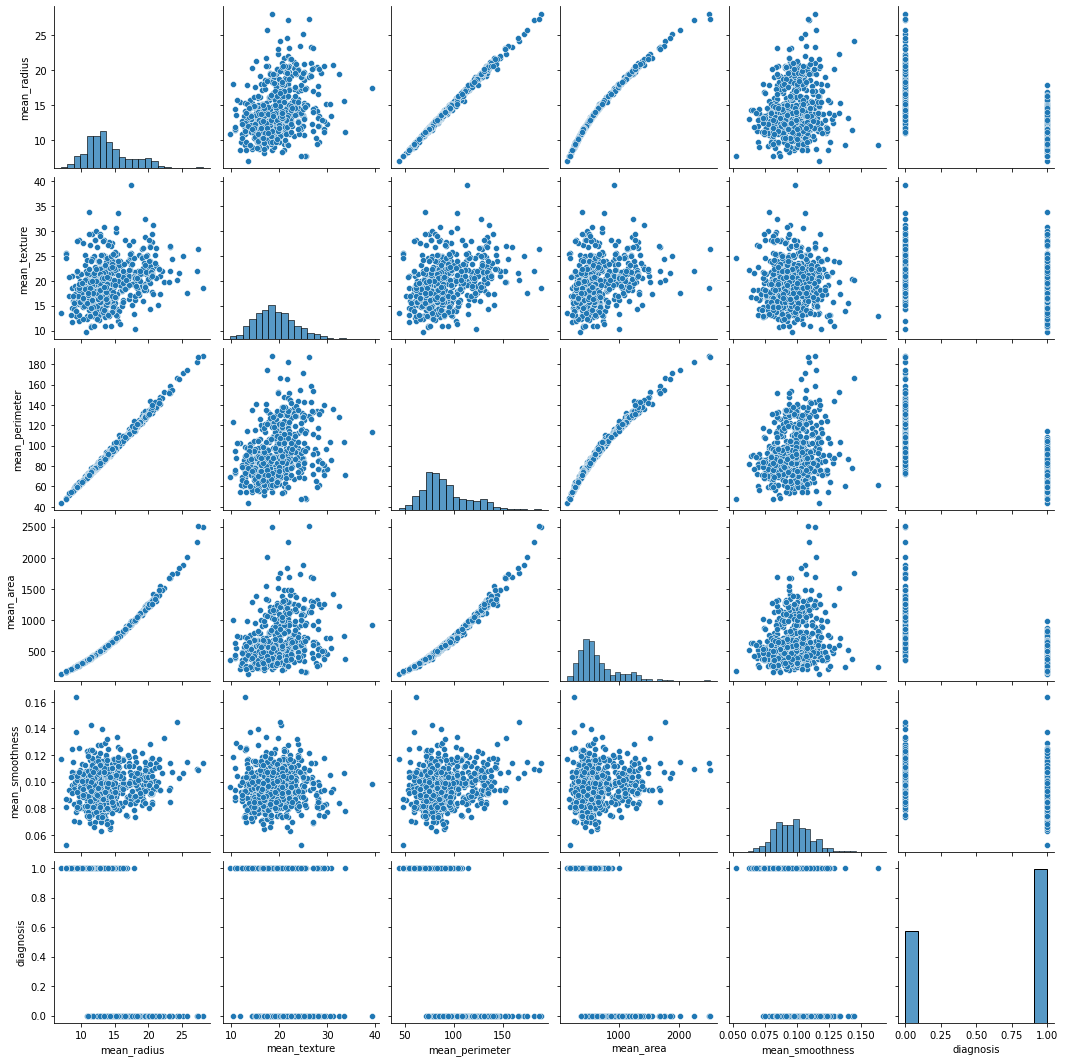

In [9]:
import seaborn as sns
sns.pairplot(df)

In [10]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-10-5def4be0ec4f>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


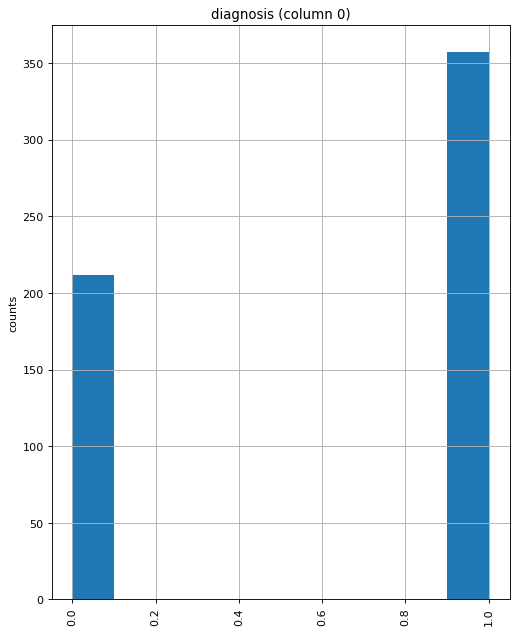

In [11]:
plotPerColumnDistribution(df, 10, 5)

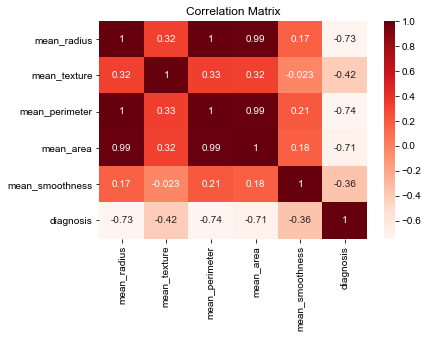

In [12]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
sns.set(rc = {'figure.figsize':(13,12)})
plt.title('Correlation Matrix');


In [13]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

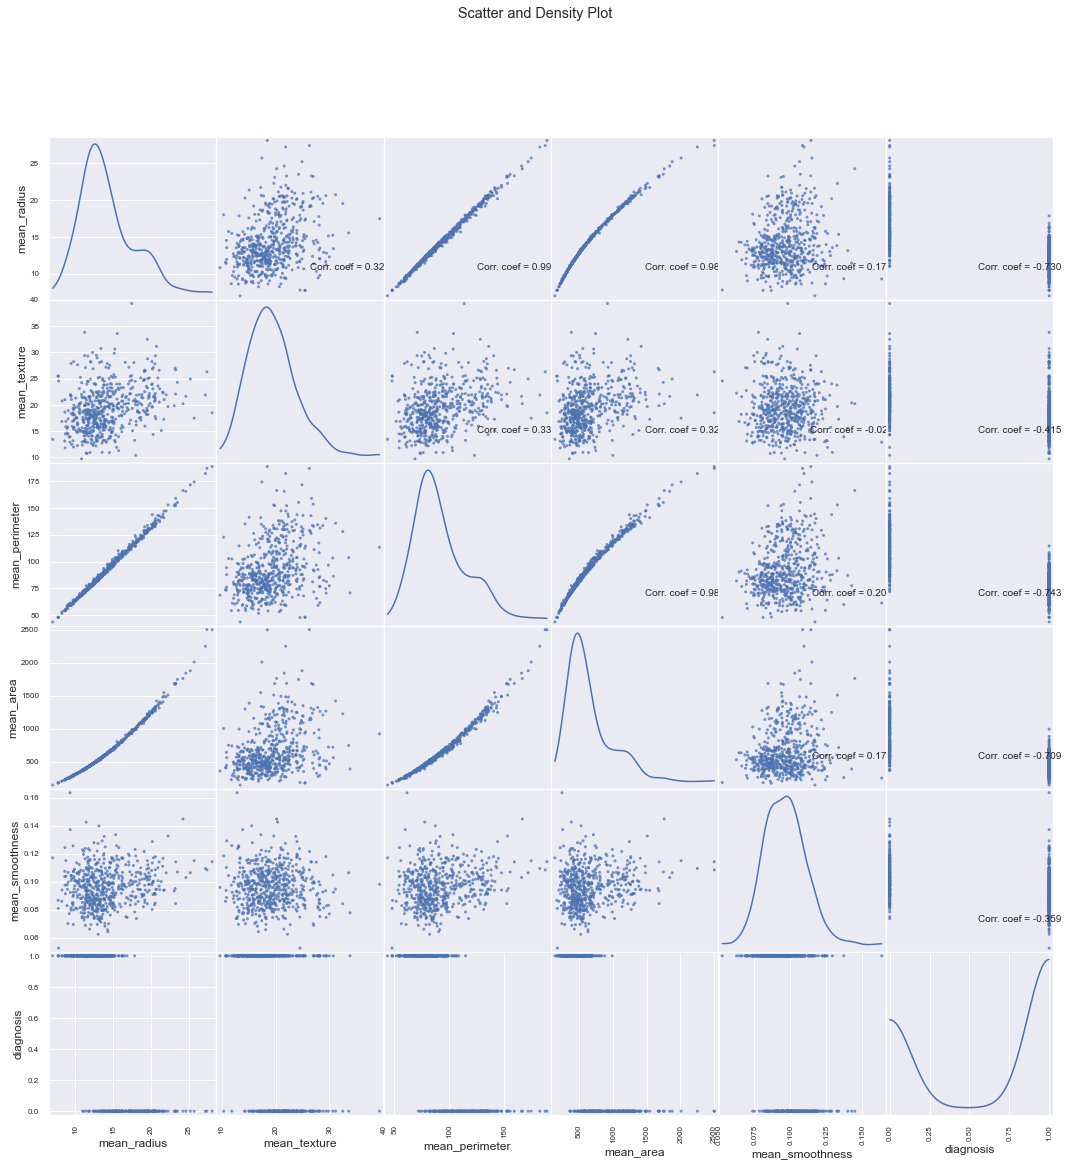

In [14]:
plotScatterMatrix(df, 18, 10)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

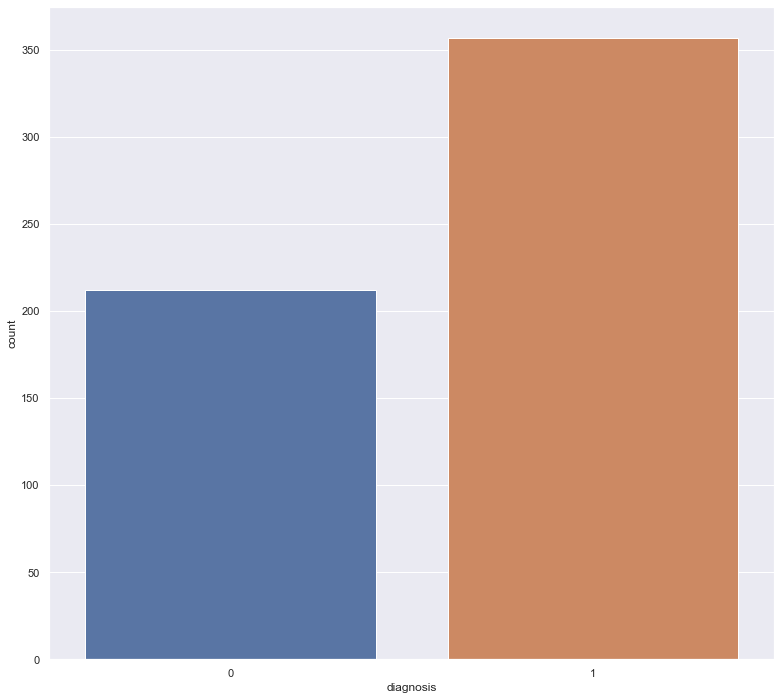

In [15]:
sns.countplot(x= 'diagnosis', data=df)

In [16]:
def features_hist(df):
    fig, axs = plt.subplots(ncols=df.shape[1], figsize=(20,5))
    for j in range(df.shape[1]):
       sns.histplot( df.iloc[:,j], kde=True, color="b", ax=axs[j]);

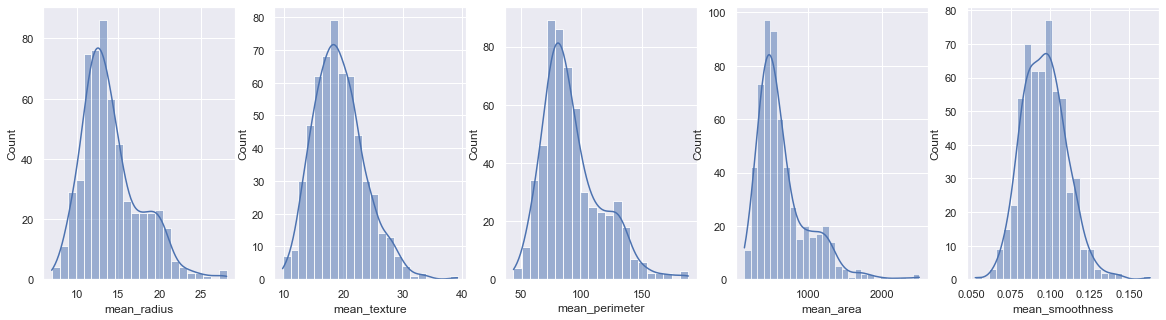

In [17]:
features_hist(df.drop('diagnosis', axis=1))

In [18]:
X= df.drop(['diagnosis'],axis=1)
y= df['diagnosis']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0,test_size=0.2)

# Note
__As we don't have any categorical data in the dataset so we don't need an OneHotEncoding or Label Encoding__.

>so we could skip this process.

#  Phase 4 — Feature Scaling

> Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. 

>We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

__Diifrent type of Scaling Features in Machine Learning__

1. MinMax Scaler

2. Standard Scaler

3. MaxAbsScaler

4. Robust Scaler

5. Quantile Transformer Scaler

6. Log Transformation

7. Power Transformer Scaler

8. Unit Vector Scaler/Normalizer

__We will use StandardScaler method from SciKit-Learn library__

In [20]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

#  Phase 5 —Model Selection

__This is the most exciting phase in Applying Machine Learning to any Dataset. It is also known as Algorithm selection for Predicting the best results__.

__Usually Data Scientists use different kinds of Machine Learning algorithms to the large data sets. But, at high level all those different algorithms can be classified in two groups : supervised learning and unsupervised learning__.

__I would just give a brief overview about these two types of learnings__.
> Supervised learning : Supervised learning is a type of system in which both input and desired output data are provided. Input and output data are labelled for classification to provide a learning basis for future data processing. Supervised learning problems can be further grouped into Regression and Classification problems.
A regression problem is when the output variable is a real or continuous value, such as “salary” or “weight”.
A classification problem is when the output variable is a category like filtering emails “spam” or “not spam”

> Unsupervised Learning : Unsupervised learning is the algorithm using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance.
In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm of supervised learning.

### We have different types of classification algorithms in Machine Learning :-

1. Logistic Regression

2. K-Nearest Neighbor

3. Support Vector Machines

4. Naïve Bayes

5. Decision Tree Algorithm

6. Random Forest Classification

__Lets start applying the algorithms__ :

> We will use sklearn library to import all the methods of classification algorithms.

> We will use LogisticRegression method of model selection to use Logistic Regression Algorithm,

## 1.Logisitic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

print('Training Accuracy: ', clf.score(X_train, y_train))
print('Testing Accuracy: ', clf.score(X_test, y_test))

Training Accuracy:  0.9340659340659341
Testing Accuracy:  0.9210526315789473


## 2.K-Nearest Neighbour(KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train,y_train)

print('Training Accuracy: ', clf.score(X_train, y_train))
print('Testing Accuracy: ', clf.score(X_test, y_test))

Training Accuracy:  0.9428571428571428
Testing Accuracy:  0.9298245614035088


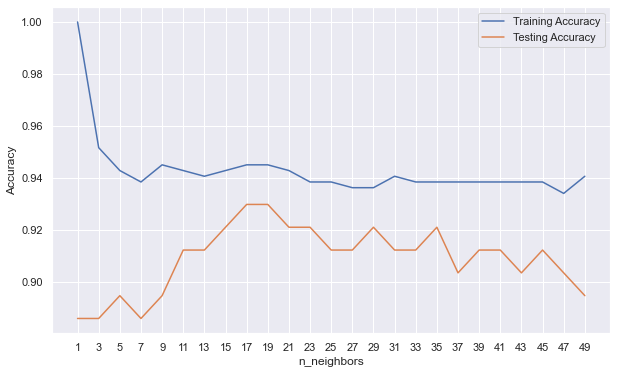

In [23]:
k_range = range(1,50,2)
training_acc = []
testing_acc = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train, y_train))
    testing_acc.append(clf.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(k_range, training_acc, label = "Training Accuracy")   
plt.plot(k_range, testing_acc, label = "Testing Accuracy")
plt.legend() 
plt.xticks(range(1,50,2))
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
_ = plt.show()

## 3. Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
print('Training Accuracy: ', classifier.score(X_train, y_train))
print('Testing Accuracy: ', classifier.score(X_test, y_test))

Training Accuracy:  0.9362637362637363
Testing Accuracy:  0.9122807017543859


## 4. Gaussian Naivye's Baye's (NB)

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

print('Training Accuracy: ', classifier.score(X_train, y_train))
print('Testing Accuracy: ', classifier.score(X_test, y_test))

Training Accuracy:  0.9032967032967033
Testing Accuracy:  0.9210526315789473


# 5.DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=3)
classifier.fit(X_train, y_train)

print('Training Accuracy: ', classifier.score(X_train, y_train))
print('Testing Accuracy: ', classifier.score(X_test, y_test))

Training Accuracy:  0.9054945054945055
Testing Accuracy:  0.8771929824561403


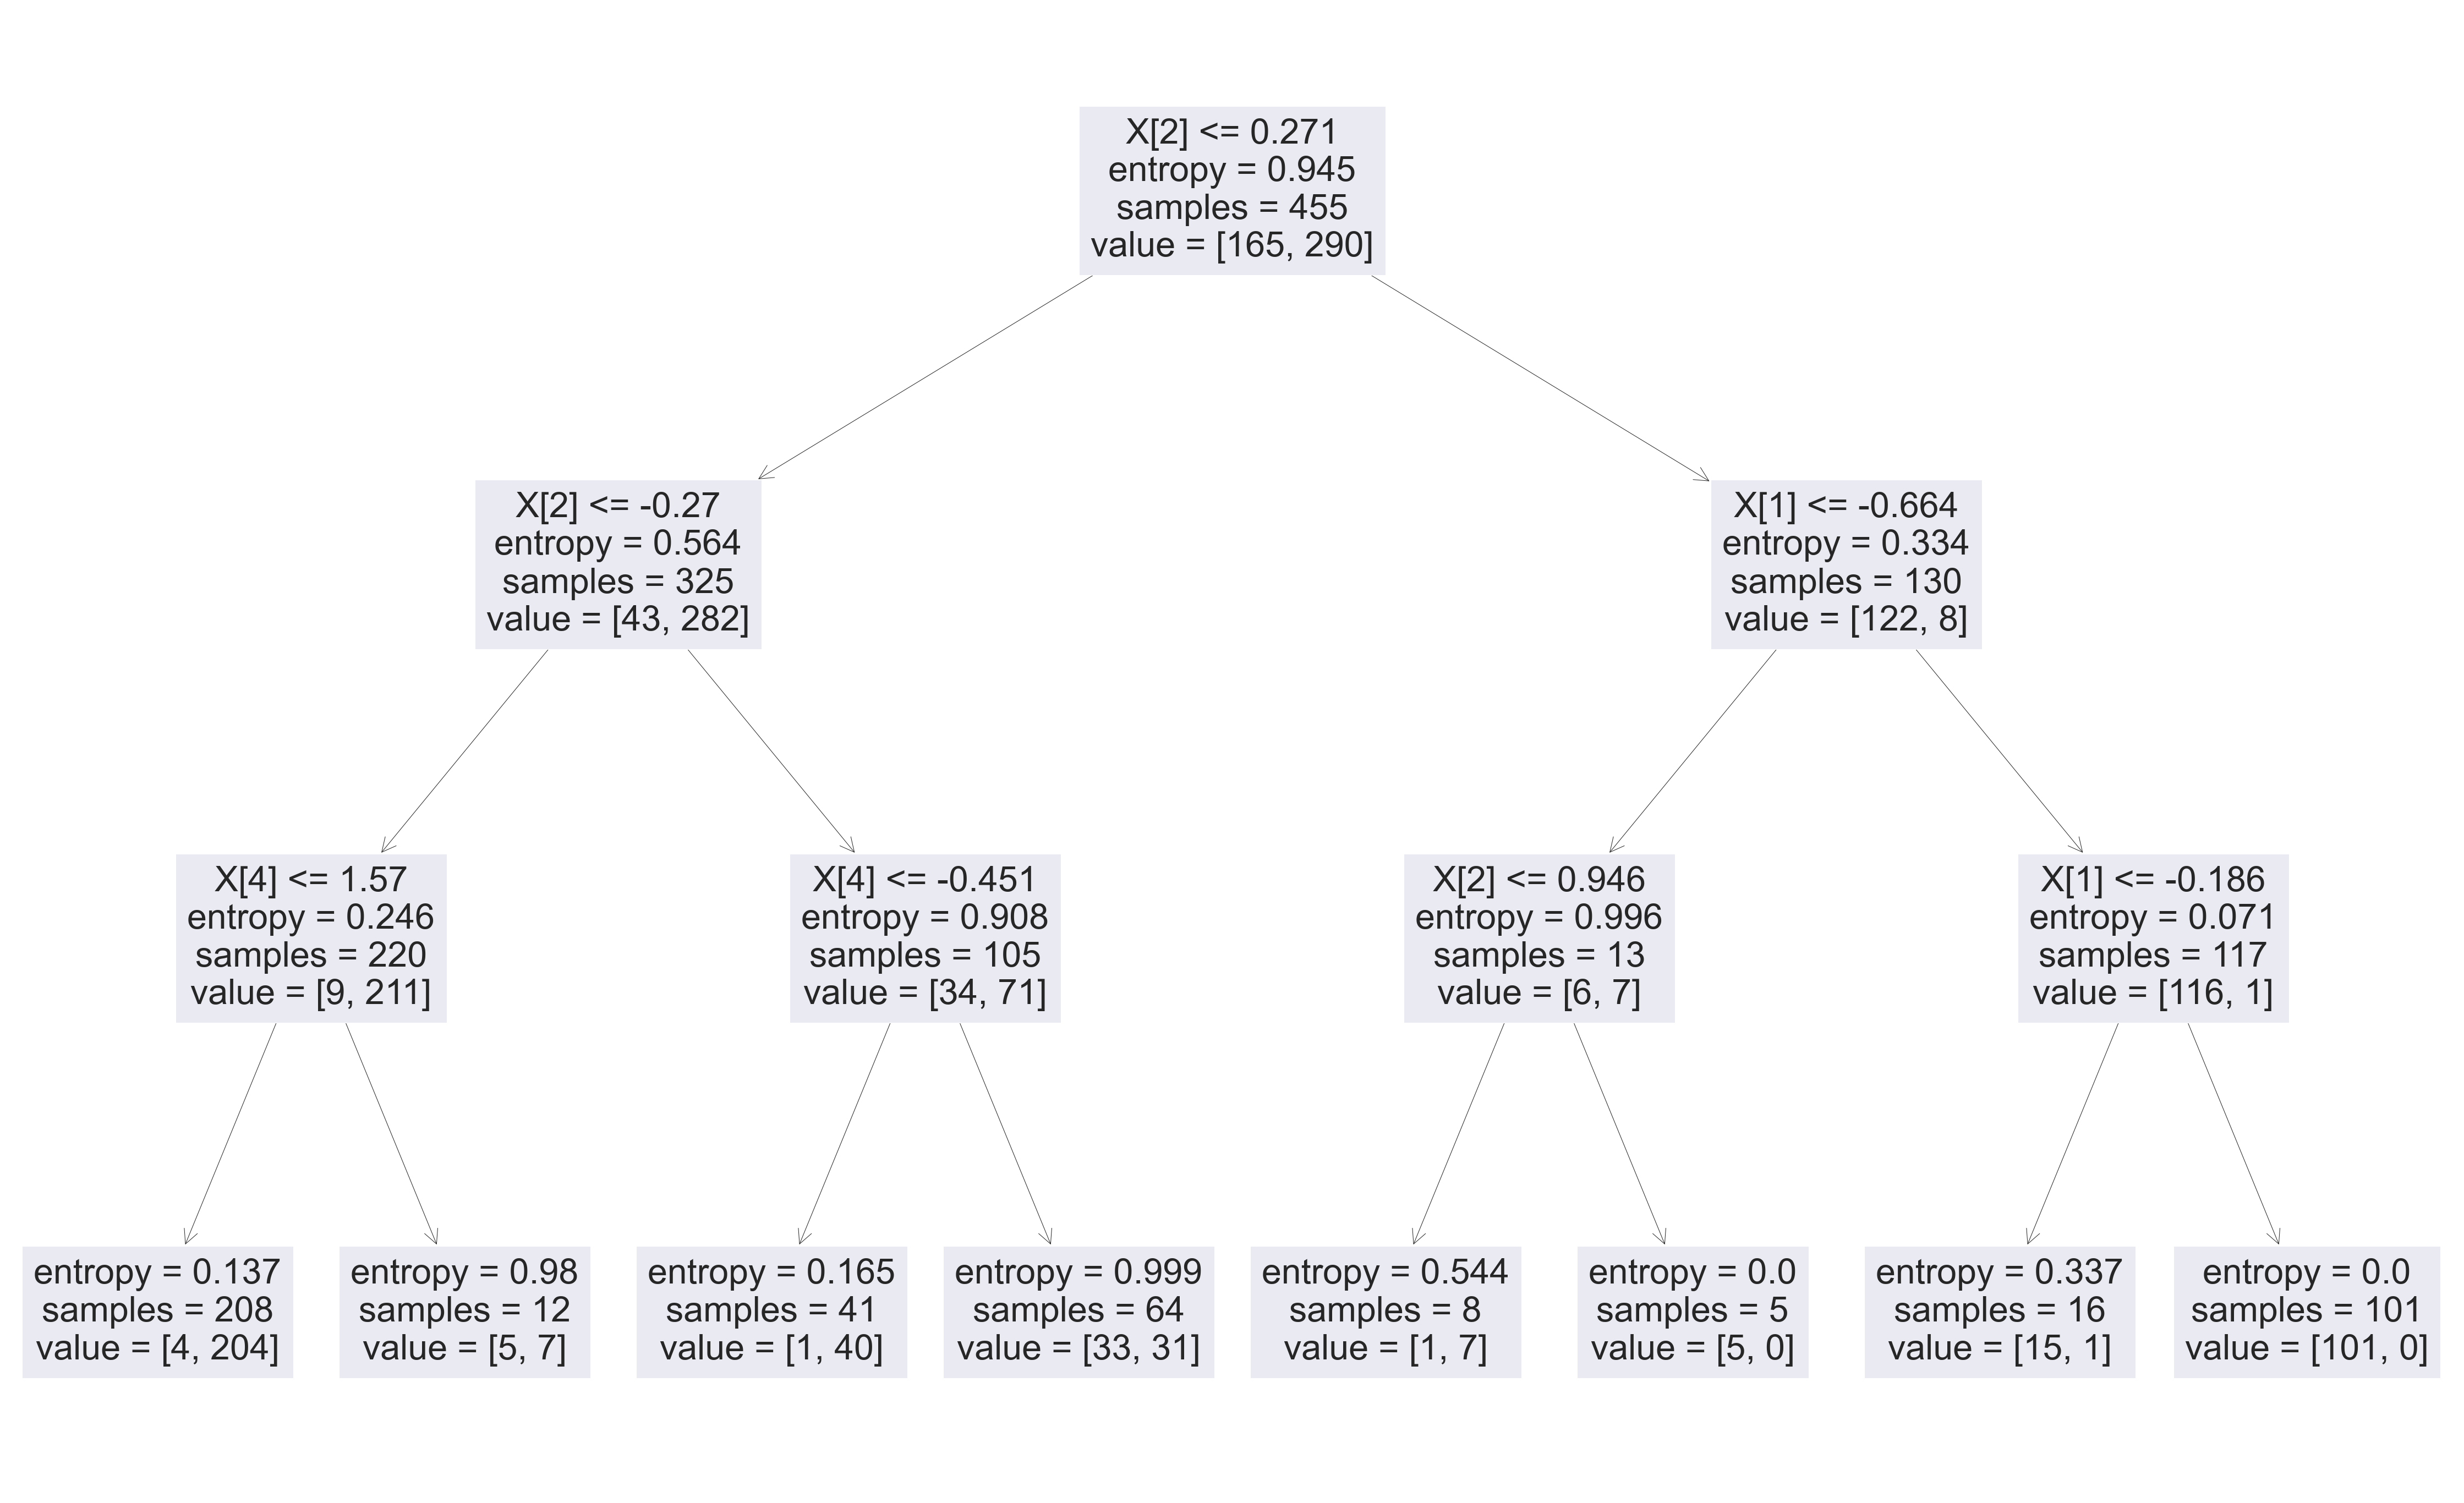

In [27]:
from sklearn.tree import plot_tree

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 80, 50

plot_tree(classifier);

# 6.RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

print('Training Accuracy: ', classifier.score(X_train, y_train))
print('Testing Accuracy: ', classifier.score(X_test, y_test))

Training Accuracy:  0.9956043956043956
Testing Accuracy:  0.9122807017543859


# Phase 6 — Model Evaluation

In [29]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1
 0 0 0]


__To check the accuracy we need to import confusion_matrix method of metrics class. The confusion matrix is a way of tabulating the number of mis-classifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes__.


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[41,  6],
       [ 4, 63]])

__After applying the different classification models, we have got below accuracies with different models__:

1. Logistic Regression — 92.05%

2. Nearest Neighbor — 92.98%

3. Support Vector Machines — 91.22%

4. Naive Bayes — 92.10%

5. Decision Tree Algorithm — 87.19%

6. Random Forest Classification — 91.6%

# __Final Conclusion__

 __So finally we have built our classification model and we can see that Logisitc Regression classification algorithm gives the best results for our dataset. Well its not always applicable to every dataset. To choose our model we always need to analyze our dataset and then apply our machine learning model__.